In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot


In [3]:
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size


In [4]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu[0]=np.mean(X[:,0])
    mu[1]=np.mean(X[:,1])
    sigma[0]=np.std(X[:,0])
    sigma[1]=np.std(X[:,1])
    X_norm[:,0]=(X_norm[:,0]-mu[0])/sigma[0]
    X_norm[:,1]=(X_norm[:,1]-mu[1])/sigma[1]

    return X_norm, mu, sigma

    


In [5]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [6]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [7]:
def computeCostMulti(X, y, theta):
    m=y.shape[0]
    temp=np.dot(X,theta)
    diff=temp-y
    J=sum((diff*diff))/(2*m)
    return J

In [8]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m=y.shape[0]
    J_history=[]
    for i in range(num_iters):
        temp3=np.dot(X,theta)-y
        temp = np.stack([temp3,temp3, temp3], axis=1)
        #temp=np.stack([temp,temp3],axis=1)
        temp2=np.multiply(temp,X)
        #print(temp)
        theta=theta-sum((alpha/m)*temp2)
#         #print(theta)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history
    

In [9]:
theta,j_history=gradientDescentMulti(X,y,[0,0,0],0.01,1500)
print(theta)

[340412.56301439 109370.05670466  -6500.61509507]


Text(0, 0.5, 'Cost')

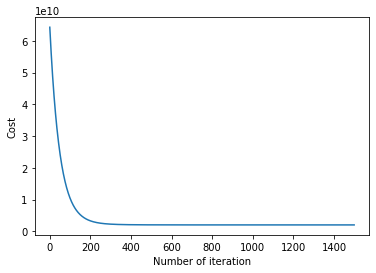

In [10]:
pyplot.plot(j_history)
pyplot.xlabel("Number of iteration")
pyplot.ylabel("Cost")

In [87]:
theta2,j_history2=gradientDescentMulti(X,y,[0,0,0],0.3,50)
print(theta2)

[340412.65345227 109398.90129361  -6529.45967813]


theta computed from gradient descent: [340412.65957447 109447.79558639  -6578.3539709 ]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $290107


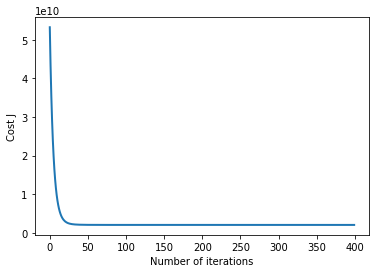

In [89]:
alpha = 0.1
num_iters = 400
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(theta)))
price=(((1650-mu[0])/sigma[0])*theta[1]-((3-mu[1])/sigma[1])*theta[2]) + theta[0] 
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))